<a href="https://colab.research.google.com/github/neal-logan/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_ProjectMilestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Milestone 2

DSBA 6211 - Summer 2024

Neal Logan

# Introduction

**Task**: State your project objective and the chosen dataset.
Describe the specific problem you aim to solve or the question you intend to answer.
Consider and discuss the business application of your project. How could the results of your analysis or model be used in a business context? What potential impact could it have?

### Problem, Application, and Impact

I intend to produce a set of models which predict whether a particular URL is intended to be used for phishing or not.  

Depending on context, this could be used to provide suspected-phishing warnings to users, to block users from visiting these sites, to identify targets for takedown requests, or to otherwise direct the efforts of law enforcement or security or trust & safety teams.  

In general, the impact would be to mitigate security threats from phishing; the mechanisms would vary with use case.

### Dataset

I will use a dataset provided by HuggingFace user pirocheto and hosted on HuggingFace:

https://huggingface.co/datasets/pirocheto/phishing-url


# Literature Review

**Task**: Find at least two online resources such as blog posts or tutorials that provide a code-implemented project related to your topic. Summarize the key points and explain how they are relevant to your work. Note that the resources should generally not be academic articles unless they include code.[link text](https://)

### Overview

I asked ChatGPT to find me relevant projects which included code.  After reviewing them and summarizing their contents, I included the best three projects below.


### Phishing URL Detection by Pirocheto
https://github.com/pirocheto/phishing-url-detection

This repository contains a complete project for phishing URL detection using machine learning and MLOps practices. It uses a TF-IDF vectorizer using both character and word n-grams) with a linear SVM model. The code is designed to be lightweight and fast, suitable for embedding in applications, and can work offline, without an internet connection. The repository also includes instructions for reproducing the model and running the pipeline.

This project is relevant both for the subject matter and because of its relation to the dataset I'm using.

### PhishShield by Praneeth Katuri
https://github.com/praneeth-katuri/PhishShield

This GitHub repository provides a comprehensive solution for detecting phishing websites using analytical models and custom transformers for preprocessing. It includes feature-based and text-based models, including random forest, LGBM, SVC, logistic regression, and Multinomial Naive Bayes, and takes advantage of grid-search with cross-validation. The repository also offers Flask deployment for real-time URL prediction and caching for performance improvement.

This project is relevant because it explores and compares a variety of techniques for detecting malicious URLs.

### Phishing Link Detection by Sayan Maity
https://github.com/Sayan-Maity-Code/Phishing-link-detection

This project uses Multinomial Naive Bayes and Logistic Regression to detect malicious URLs. The model's preprocessing involves tokenization and TF-IDF vectorization. The project includes scripts for training and evaluating the model.

This project is relevant mainly in that it provides an additoinal perspective on the topic.



# Data Preparation

**Task**: Detail the steps taken to clean and preprocess your data.
Include any transformations, feature engineering, or handling of missing values:



### Data Preparation Overview

The dataset as posted on HuggingFace is already cleaned and partly preprocessed. 87 featurese are already extracted, including 56 from URL syntax and structure, 24 from page content, and 7 from external services.  No cleaning should be necessary.

I will perform some limited additional preprocessing in my model pipelines including scaling, bucketing, and dimensionality reduction, on a feature-by-feature basis.

The scaling/bucketing steps for many features will consist only of the application of standard scaling and ordinal bucketing. However, features like domain_registration_length or web_traffic likely need to be log-scaled or percentile-bucketed. Other features, like page_rank, may not benefit from scaling or bucketing, and won't be transformed. Some features




### Data Management

In [8]:
#Get the dataset from HuggingFace & deposit locally
import pandas as pd

splits = {'train': 'data/train.parquet', 'test': 'data/test.parquet'}
df = pd.read_parquet("hf://datasets/pirocheto/phishing-url/" + splits["train"])

df.to_csv('phishing-url-pirochet-train.csv')


In [ ]:
#Download data file
# from google.colab import files
# df.to_csv('phishing-url-pirochet-train.csv')
# files.download('phishing-url-pirochet-train.csv')


In [88]:
# Re-import the dataset locally, if necessary
df = pd.read_csv('phishing-url-pirochet-train.csv')


### Initial transformation









In [100]:
# Set a numeric label
df['y'] = [1 if x == 'phishing' else 0 for x in df['status']]

# df.head()
# print(str(df[df['status']=='legitimate'].count()))
# df[df['y'] == 0].count()
# df[df['status']=='phishing'].count()
# df[df['y'] == 1].count()
# df.count()


Unnamed: 0         3829
url                3829
length_url         3829
length_hostname    3829
ip                 3829
                   ... 
dns_record         3829
google_index       3829
page_rank          3829
status             3829
y                  3829
Length: 91, dtype: int64

# Methodology

**Task**: Outline the methods and models you plan to use.
This should include:
For predictive modeling: Describe the models you will compare (e.g., logistic regression, Boosting trees, etc.).
For text mining: Describe the techniques and tools you will use for text processing and analysis (e.g., TF-IDF, etc.).
For forecasting: Describe the time series models you will explore (e.g., ARIMA).

### Overall Structure

SKlearn Pipelines, containing at least:

*   Preprocessing as described in the Data Preparation section, including scaling and bucketing (as appropriate, on a feature-by-feature basis) and dimensionality reduction.
*   Grid search for cross validation and hyperparameter tuning, including a few different approaches to regularization.
*   Various models, including at least random forest and logistic regression.

A comparison of model performance using each of the different pipelines

Some kind of safe, versatile deployment process

### Preprocessing

Scaling

Bucketing

Dimensionality reduction?

Polynomial interactions?

### Grid Search - cross-validation and hyperparameter tuning

Cross-validation

Regularization


### Models

Random Forest

Logistic Regression

XGBoost?



# Preliminary Analysis

**Task**: Present exploratory data analysis (EDA) to understand the dataset's structure, relationships, and key features.
Include visualizations and summary statistics that support your preliminary findings.


### Data Recon

#### Shape, head, and list of columns

In [82]:
#Shape
print('Rows: ' + str(df.shape[0]) + '\nColumns: ' + str(df.shape[1]))

Rows: 7658
Columns: 89


In [83]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,0,...,1,1,0,240,8892,67860,0,1,4,legitimate
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,phishing
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,phishing
3,https://www.bedslide.com,24,16,0,2,0,0,0,0,0,...,0,0,0,139,7531,1059151,0,0,4,legitimate
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,0,...,0,0,0,3002,7590,635,0,1,5,legitimate


In [84]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [85]:
#Head
for i in range (0,90,14):
    print(df.iloc[:,i:i+14].head())


                                                 url  length_url  \
0  https://www.todayshomeowner.com/how-to-make-ho...          82   
1  http://thapthan.ac.th/information/confirmation...          93   
2  http://app.dialoginsight.com/T/OFC4/L2S/3888/B...         121   
3                           https://www.bedslide.com          24   
4  https://tabs.ultimate-guitar.com/s/sex_pistols...          73   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0               23   0        2           7      0      0       0      0   
1               14   1        2           0      0      0       0      0   
2               21   1        3           0      0      0       0      0   
3               16   0        2           0      0      0       0      0   
4               24   0        3           1      0      0       0      0   

   nb_eq  nb_underscore  nb_tilde  nb_percent  
0      0              0         0           0  
1      0              0         0     

#### Summary statistics - all columns

In [86]:
#Summary Stats
import numpy as np

includes = [np.number]

for i in range (0,90,14):
    print(df.iloc[:,i:i+14].describe(include=includes))





        length_url  length_hostname           ip      nb_dots   nb_hyphens  \
count  7658.000000      7658.000000  7658.000000  7658.000000  7658.000000   
mean     61.031993        20.998694     0.148211     2.468399     1.003265   
std      58.652024        10.207985     0.355332     1.378526     2.055865   
min      12.000000         4.000000     0.000000     1.000000     0.000000   
25%      32.000000        15.000000     0.000000     2.000000     0.000000   
50%      47.000000        19.000000     0.000000     2.000000     0.000000   
75%      70.000000        24.000000     0.000000     3.000000     1.000000   
max    1641.000000       213.000000     1.000000    24.000000    32.000000   

             nb_at        nb_qm       nb_and   nb_or        nb_eq  \
count  7658.000000  7658.000000  7658.000000  7658.0  7658.000000   
mean      0.021154     0.142596     0.159441     0.0     0.293419   
std       0.152714     0.366461     0.834974     0.0     1.020342   
min       0.000000   

#### Boxplots - all columns

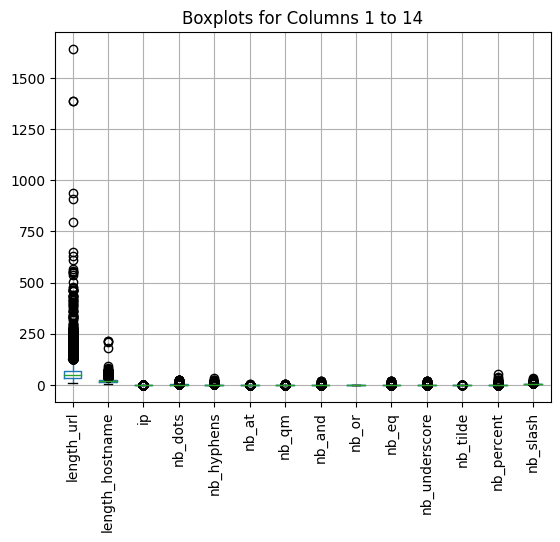

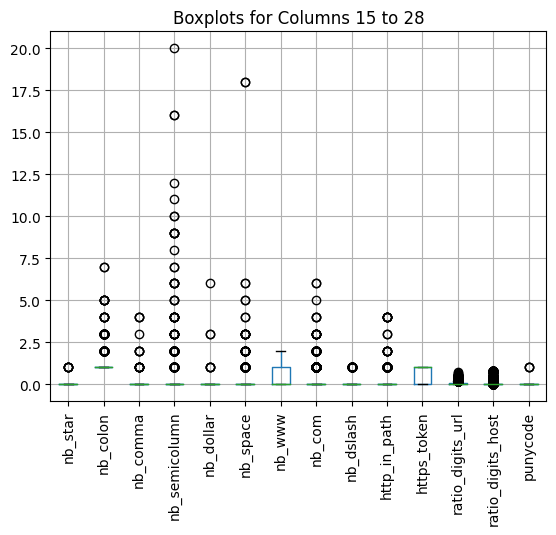

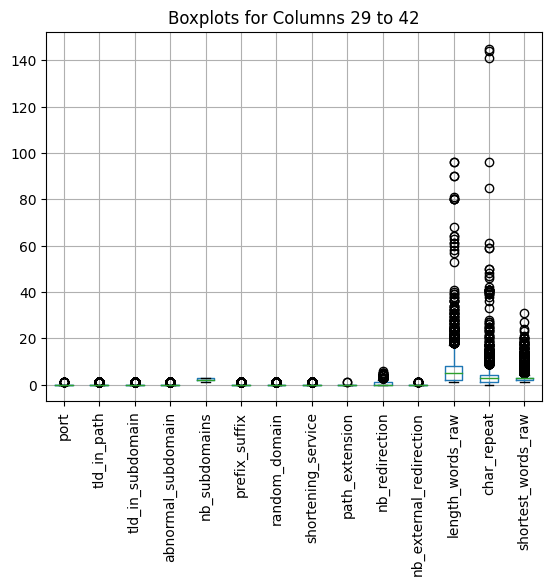

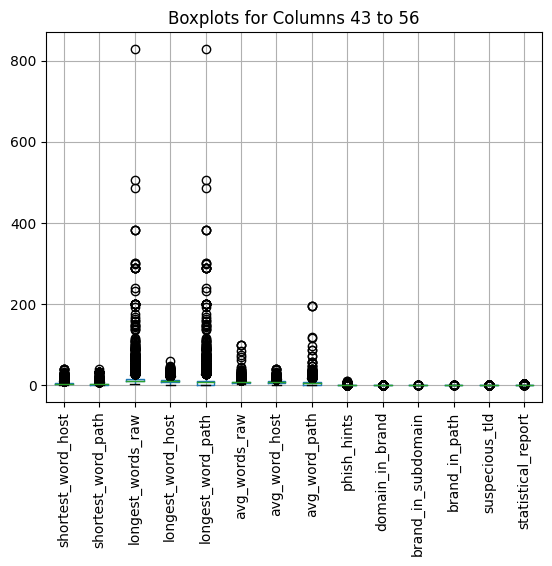

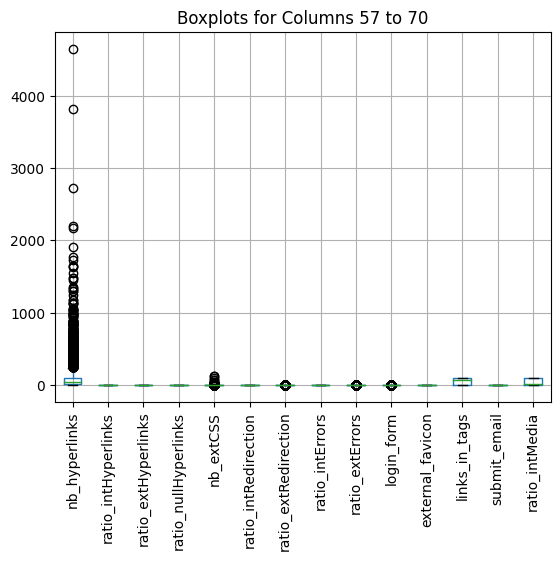

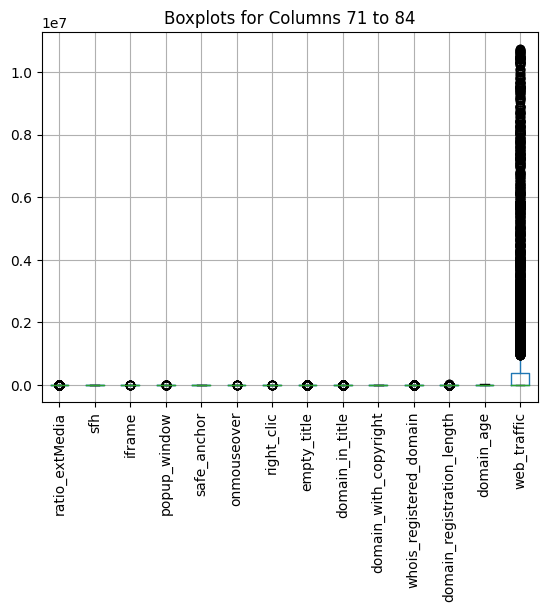

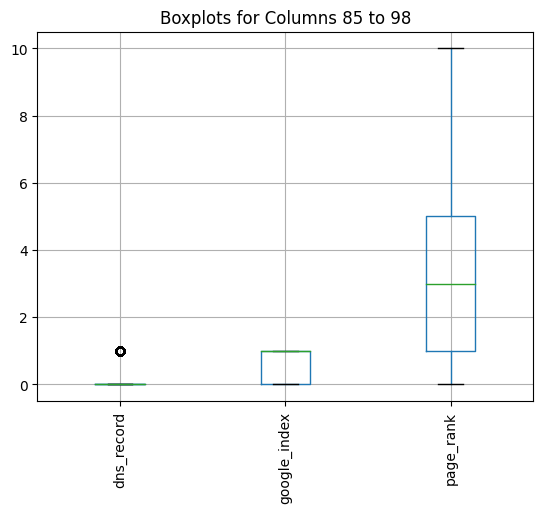

In [87]:
#Boxplots - code for this section generated as-is by ChatGPT
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your large DataFrame

# Define the number of columns per plot
columns_per_plot = 14

# Get the numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Split the numeric columns into chunks
chunks = [numeric_columns[i:i + columns_per_plot] for i in range(0, len(numeric_columns), columns_per_plot)]

# Create boxplots for each chunk
for i, chunk in enumerate(chunks):
    plt.figure()
    df[chunk].boxplot()
    plt.title(f'Boxplots for Columns {i * columns_per_plot + 1} to {(i + 1) * columns_per_plot}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()


### Data Discussion

Most of the columns are a mix of binary, small discrete numbers, or mostly-small ratios in decimal format.  Some columns have significantly larger values.  Some (very few) contain values that are apparently invalid.

While the column names follow some degree of convention, there's no simple way to delineate how each of them should be handled.

# Initial Results

**Task**: Conduct initial tests of your models or analysis techniques.
Provide a summary of the results, including any initial performance metrics or insights gained.
Discuss any challenges encountered and how you addressed them.

,Unnamed: 0,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,y
0,0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,...,1,1,0,240,8892,67860,0,1,4,0
1,1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,1
2,2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,1
3,3,https://www.bedslide.com,24,16,0,2,0,0,0,0,...,0,0,0,139,7531,1059151,0,0,4,0
4,4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,...,0,0,0,3002,7590,635,0,1,5,0


In [128]:
# X, y split

X = df.drop(columns=['y','status','url'])
y = df['status'].replace('legitimate', 0).replace('phishing', 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [132]:
# Define evaluation function

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
import pandas as pd

def evaluate(pipe : Pipeline, X : pd.DataFrame, y : pd.DataFrame):
    pred_y = pipe.predict(X)

    print("\nAccuracy: " + str(accuracy_score(pred_y, y)))
    print("\nArea under ROC curve: " + str(roc_auc_score(pred_y, y)))


### Logistic Regression

In [130]:
#Set up pipeline

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(
      StandardScaler(),
      LogisticRegression(random_state=42)
)

pipe_lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [134]:
# Evaluate performance against training and test set

evaluate(pipe_lr, X_train, y_train)

evaluate(pipe_lr, X_test, y_test)




Accuracy: 0.951028403525955

Area under ROC curve: 0.9510487438184406

Accuracy: 0.943864229765013

Area under ROC curve: 0.9438339001252909


#### Logistic Regression Summary

Logistic regression failed to converge, which is curious.  Still, the accuracy of the resulting model is quite reasonable, and the difference between the accuracy on the training and test sets is small.  Given that the dataset is balanced, this bodes well.  However, more preprocessing may be in order.

### Random Forest

In [135]:
#Set up & run pipeline - random forest

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipe_rf = make_pipeline(
      StandardScaler(),
      RandomForestClassifier(random_state=42)
)

pipe_rf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [136]:
# Evaluate performance against training and test set

evaluate(pipe_rf, X_train, y_train)

evaluate(pipe_rf, X_test, y_test)



Accuracy: 1.0

Area under ROC curve: 1.0

Accuracy: 0.9640992167101827

Area under ROC curve: 0.9640612217071176


#### Random Forest Summary

The accuracy is somewhat better than logistic regression.  The difference in accuracy between training and test is high enough to suggest mild overtraining.



### Gradient-boosted Trees

In [137]:
# Set up and run pipeline - gradient boosted trees

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline

pipe_gbt = make_pipeline(
      StandardScaler(),
      HistGradientBoostingClassifier(random_state=42)
)

pipe_gbt.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [138]:
# Evaluate performance against training and test set

evaluate(pipe_gbt, X_train, y_train)

evaluate(pipe_gbt, X_test, y_test)



Accuracy: 1.0

Area under ROC curve: 1.0

Accuracy: 0.966710182767624

Area under ROC curve: 0.9666917826433827


#### Gradient-boosted Trees Summary

The acuracy is improved very slightly over random forest, and risks of overtraining are present but minimal.  Given that the dataset is not unreasonably large, it may be worth trying a non-histogram version of gradient boosting.

# Next Steps

**Task**: Outline the steps you plan to take to refine your approach and improve your results.
Highlight any additional data you might need, further analyses, or alternative methodologies you are considering.

### Overview


### Data Cleaning & Preparation


### Model Pipelines


### Evaluation


### Deployment



